In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import math
import statistics as stat 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('nyc-rolling-sales.csv')
df


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [49]:
missing_values =[' -  ', '0']
df = pd.read_csv('nyc-rolling-sales.csv', na_values = missing_values)
df['YEAR SOLD']=df['SALE DATE'].map(lambda x: x[0:4])
df['YEAR SOLD']=df['YEAR SOLD'].map(lambda x: int(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84547 non-null  object 
 11  ZIP CODE                        83566 non-null  float64
 12  RESIDENTIAL UNITS               

In [5]:
df.isnull().sum()


Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      1
ZIP CODE                            982
RESIDENTIAL UNITS                 24783
COMMERCIAL UNITS                  79429
TOTAL UNITS                       19762
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        24789
SALE DATE                             0
YEAR SOLD                             0
dtype: int64

In [6]:
#Range Sale Price
range_price = df['SALE PRICE'].max()- df['SALE PRICE'].min()
print(range_price)
range_land = df['LAND SQUARE FEET'].max()- df['LAND SQUARE FEET'].min()
print(range_land)

2209999999.0
4252325.0


In [7]:
#MEAN SALE PRICE Rataan Harga Properti

df.count()
n_sale_price = 59759
total_sale_price = df['SALE PRICE'].sum()
mean_sale_price = total_sale_price/ n_sale_price
print(mean_sale_price)
     #cara lain dengan numpymean
print(np.nanmean(df['SALE PRICE']))

#MEAN SALE PER BOROOUGH Rataan Penjualan Properti per Wilayah
mean_sale_per_borough = df['BOROUGH'].value_counts().sum()/5
print(mean_sale_per_borough)


1494927.306497766
1494927.306497766
16909.6


In [8]:
#Median Sale Price Titik Tengah Harga Properti
np.nanmedian(df['SALE PRICE'])


625500.0

In [9]:
#MODE SALE BOROUGH Penjualan di Wilayah Tertinggi 
mode_borough = scipy.stats.mode(df['BOROUGH'])
print(mode_borough)

ModeResult(mode=array([4], dtype=int64), count=array([26736]))


In [10]:
#Variance of Sale Price
var_price = np.var(df['SALE PRICE'], ddof = 1)
df['SALE PRICE'].var(ddof=1)

152017322853222.62

In [11]:
#Standard Deviation Sale Price
sd_price = var_price ** 0.5
np.nanstd(df['SALE PRICE'])

12329427.359509237

In [12]:
#SKEW & COURTOSIS
x = df['SALE PRICE']
n = 59759
from scipy.stats import skew
skew(x)

nan

In [13]:
scipy.stats.describe(df['SALE PRICE'], ddof = 1, bias = False, nan_policy='omit')

DescribeResult(nobs=59759, minmax=(masked_array(data=1.,
             mask=False,
       fill_value=1e+20), masked_array(data=2.21e+09,
             mask=False,
       fill_value=1e+20)), mean=1494927.306497766, variance=152017322853219.03, skewness=masked_array(data=114.9858198,
             mask=False,
       fill_value=1e+20), kurtosis=-3737.780000826363)

Text(0.5, 0, 'Borough')

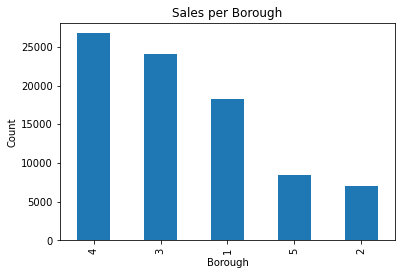

In [14]:
df['BOROUGH'].value_counts().plot(kind='bar')
plt.title('Sales per Borough')
plt.ylabel('Count')
plt.xlabel('Borough')

Text(0.5, 1.0, 'Distribution Sale Price of Property')

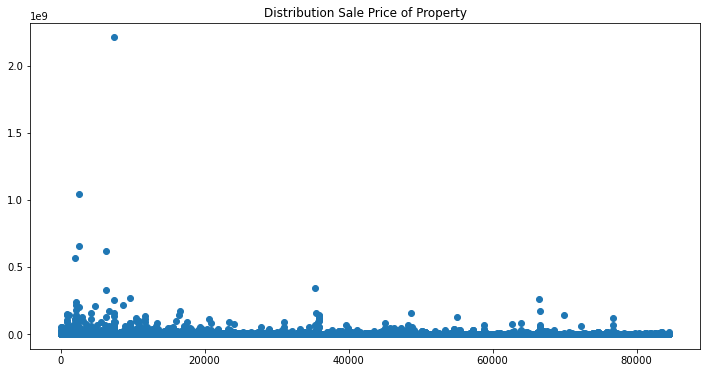

In [15]:
#Distribution of Sale Price
df['SALE PRICE'].plot(marker='o',linestyle='', figsize=(12,6))
plt.title('Distribution Sale Price of Property')

In [16]:
#Confidence Interval

mean = 1494927.306497766
std = 12329427.359509237
n = 59759
z = 1.96 

# calculate se
se = std / np.sqrt(n)
se

lcb = mean - z * se
ucb = mean + z * se
lcb, ucb


(1396072.6077677582, 1593782.0052277737)

In [40]:
#df.set_index('Unnamed: 0')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR SOLD
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,NaN,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00,2017
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,3.0,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00,2016
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,1.0,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00,2016
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,NaN,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00,2016
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,NaN,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,NaN,2.0,2400.0,2575.0,1998.0,1,B9,450000.0,2016-11-28 00:00:00,2016
8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,NaN,2.0,2498.0,2377.0,1998.0,1,B9,550000.0,2017-04-21 00:00:00,2017
8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,NaN,2.0,4000.0,1496.0,1925.0,1,B2,460000.0,2017-07-05 00:00:00,2017


[59748     6     3     0     1     0     0     0     0     1]
[1.00000000e+00 2.21000001e+08 4.42000001e+08 6.63000001e+08
 8.84000001e+08 1.10500000e+09 1.32600000e+09 1.54700000e+09
 1.76800000e+09 1.98900000e+09 2.21000000e+09]


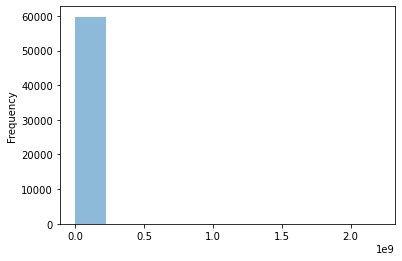

In [56]:
ds = df.dropna(subset = ['SALE PRICE'])

ds['SALE PRICE'].sort_values(ascending=False)
ds['SALE PRICE'].plot.hist(alpha=0.5)

count, bin_edges = np.histogram(ds['SALE PRICE'])
print(count)
print(bin_edges)

#Grafik menunjukan distribusi harga properti hampir seluruhnya berada di kisaran 1-221000000 dolar

In [ ]:
#Apakah harga penjualan property di tahun 2017 sama dibanding 2016?

# H0: μ1 == μ2
# H1: μ1 != μ2


In [71]:
ds_16 = ds.loc[(ds['YEAR SOLD'] == 2016)]
ds_17 = ds.loc[(ds['YEAR SOLD'] == 2017)]
ds_16.describe()
ds_17.describe()


,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,YEAR SOLD
count,39457.000000,39457.000000,39457.000000,39457.000000,38927.000000,26934.000000,1788.000000,28230.000000,1.961200e+04,1.892100e+04,36424.000000,39457.000000,3.945700e+04,39457.0
mean,10349.995159,2.921408,4111.357452,402.858935,10822.508619,2.340796,2.541946,2.410698,4.732405e+03,4.386058e+03,1950.938996,1.633424,1.462303e+06,2017.0
std,7078.318574,1.325969,3561.943714,673.311080,575.146912,15.605121,15.472702,15.914601,5.082842e+04,3.856498e+04,34.762880,0.695612,1.358580e+07,0.0
min,4.000000,1.000000,1.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,3.300000e+01,1.200000e+02,1111.000000,1.000000,1.000000e+00,2017.0
25%,4283.000000,2.000000,1261.000000,22.000000,10301.000000,1.000000,1.000000,1.000000,2.000000e+03,1.364000e+03,1925.000000,1.000000,3.802500e+05,2017.0
50%,9140.000000,3.000000,3111.000000,51.000000,11207.000000,1.000000,1.000000,1.000000,2.500000e+03,1.872000e+03,1949.000000,2.000000,6.417390e+05,2017.0
75%,15746.000000,4.000000,6004.000000,1004.000000,11356.000000,2.000000,2.000000,2.000000,4.000000e+03,2.675000e+03,1972.000000,2.000000,1.101746e+06,2017.0
max,26738.000000,5.000000,16317.000000,9099.000000,11694.000000,1844.000000,436.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09,2017.0


In [66]:
n1 = len(ds_16)
mu1 = ds_16['SALE PRICE'].mean()
sd1 = ds_16['SALE PRICE'].std()

(n1, mu1, sd1)

(20302, 1558332.8392769184, 9420358.976169527)

In [67]:
n2 = len(ds_17)
mu2 = ds_17['SALE PRICE'].mean()
sd2 = ds_17['SALE PRICE'].std()

(n2, mu2, sd2)

(39457, 1462302.9527333553, 13585802.216538949)

In [70]:
import statsmodels.api as sm
sm.stats.ztest(ds_16['SALE PRICE'], ds_17['SALE PRICE'], alternative='two-sided')

(0.9017558714740836, 0.36718656611139966)

In [ ]:
#Hasil p-value cukup tinggi, sehingga dapat disimpulkan ada perubahan harga penjualan properti di tahun 2017

Text(0.5, 1.0, 'Property Sold from 2016-2017')

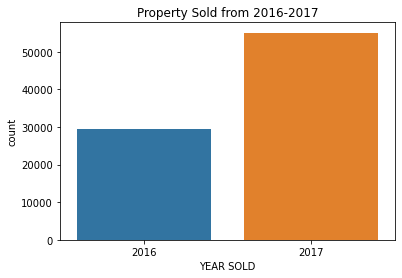

In [20]:
sns.countplot(x='YEAR SOLD', data=df)
plt.title('Property Sold from 2016-2017')

Text(0.5, 1.0, 'Property Sold per Borough 2016-2017')

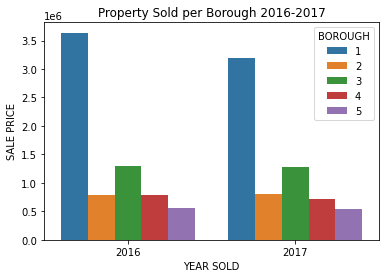

In [21]:
sns.barplot(x='YEAR SOLD', y='SALE PRICE', hue='BOROUGH', data = df, ci = None)
plt.title('Property Sold per Borough 2016-2017')